In [1]:
from data_utils import *
import numpy as np

import matplotlib.pyplot as plt
from cnn import *
from layers import *
from solver import *
%matplotlib inline

In [2]:
data = get_pancake_data()

Postive example shape:  (68, 3, 100, 100)
Negative example shape:  (220, 3, 100, 100)
X_train shape:  (230, 3, 100, 100)
y_train shape:  (230,)
X_val shape:  (58, 3, 100, 100)
y_val shape:  (58,)


In [3]:
model = ThreeLayerConvNet(weight_scale=1e-2,input_dim=(3,100,100),hidden_dim=500,num_classes=2,num_filters=32)
solver = Solver(model, data,
                num_epochs=10, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-4,
                },
                verbose=True, print_every=2)
solver.train()

(Iteration 1 / 40) loss: 8.005172
(Epoch 0 / 10) train acc: 0.782609; val_acc: 0.689655


layers.py:646: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(probs[np.arange(N), y])) / N


(Iteration 3 / 40) loss: inf
(Epoch 1 / 10) train acc: 0.782609; val_acc: 0.689655
(Iteration 5 / 40) loss: inf
(Iteration 7 / 40) loss: inf
(Epoch 2 / 10) train acc: 0.782609; val_acc: 0.689655
(Iteration 9 / 40) loss: inf
(Iteration 11 / 40) loss: 13.606686
(Epoch 3 / 10) train acc: 0.221739; val_acc: 0.310345
(Iteration 13 / 40) loss: 5.729589
(Iteration 15 / 40) loss: 3.823952
(Epoch 4 / 10) train acc: 0.769565; val_acc: 0.758621
(Iteration 17 / 40) loss: 1.497215
(Iteration 19 / 40) loss: 1.616853
(Epoch 5 / 10) train acc: 0.791304; val_acc: 0.706897
(Iteration 21 / 40) loss: 3.620321
(Iteration 23 / 40) loss: 1.611636
(Epoch 6 / 10) train acc: 0.795652; val_acc: 0.758621
(Iteration 25 / 40) loss: 0.891289
(Iteration 27 / 40) loss: 0.667413
(Epoch 7 / 10) train acc: 0.673913; val_acc: 0.620690
(Iteration 29 / 40) loss: 1.144936
(Iteration 31 / 40) loss: 0.200810
(Epoch 8 / 10) train acc: 0.817391; val_acc: 0.758621
(Iteration 33 / 40) loss: 0.408924
(Iteration 35 / 40) loss: 0.485

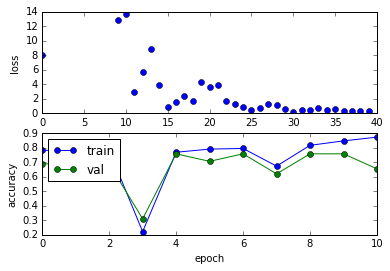

In [4]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

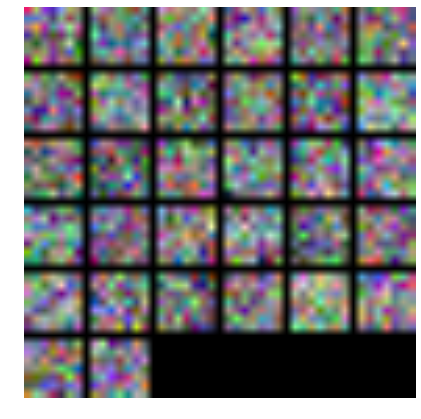

In [5]:
from vis_utils import visualize_grid

grid = visualize_grid(model.params['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(7, 7)
plt.show()